In [75]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr


In [76]:
# Function to fetch all planet data from SWAPI
def get_all_planet_data():
    all_planets_data = []

    for planet_id in range(1, 62):  # There are 60 planets in the SWAPI
        api_url = f'https://swapi.dev/api/planets/{planet_id}/'
        response = requests.get(api_url)

        if response.status_code == 200:
            planet_data = response.json()
            all_planets_data.append(planet_data)

    return all_planets_data

In [77]:
# Fetch all planet data
all_planets_data = get_all_planet_data()

# Create a DataFrame from the list of planet data
planets_df = pd.DataFrame(all_planets_data)

In [82]:
# Remove all planets with a diameter of '0' or 'unknown'
planets_df = planets_df[(planets_df['diameter'] != 0)]
planets_df = planets_df[planets_df['diameter'] != 'unknown']

In [79]:
# Remove columns after "population"
planets_df = planets_df.loc[:, :'population']

In [80]:
# Convert diameter to numeric
planets_df['diameter'] = pd.to_numeric(planets_df['diameter'])

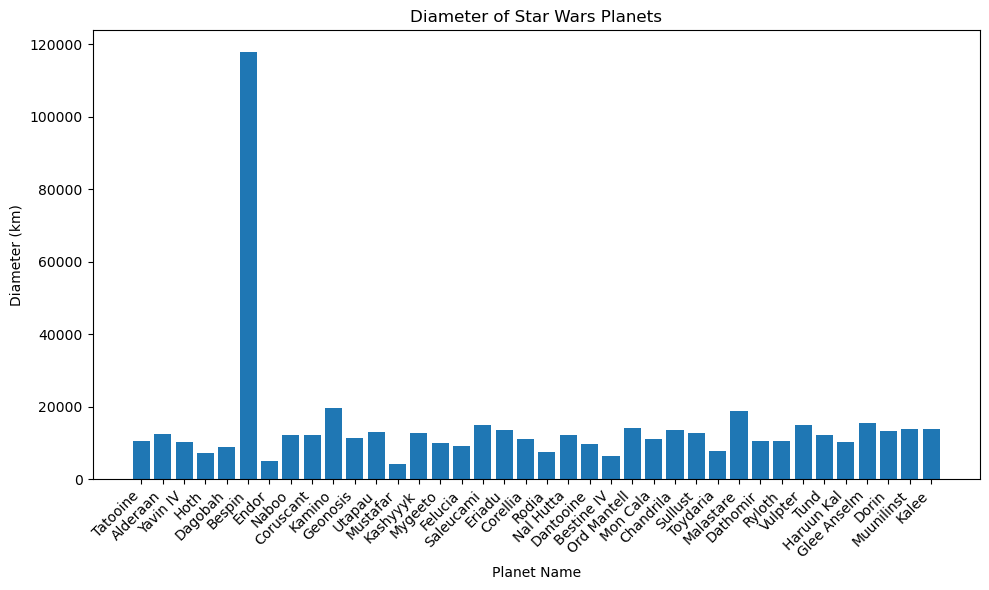

In [84]:
# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(planets_df['name'], planets_df['diameter'])
plt.xticks(rotation=45, ha='right')
plt.title('Diameter of Star Wars Planets')
plt.xlabel('Planet Name')
plt.ylabel('Diameter (km)')
plt.tight_layout()
plt.show()

In [85]:
# Reset the index to ensure correct alignment with y-axis ticks
planets_df.reset_index(drop=True, inplace=True)

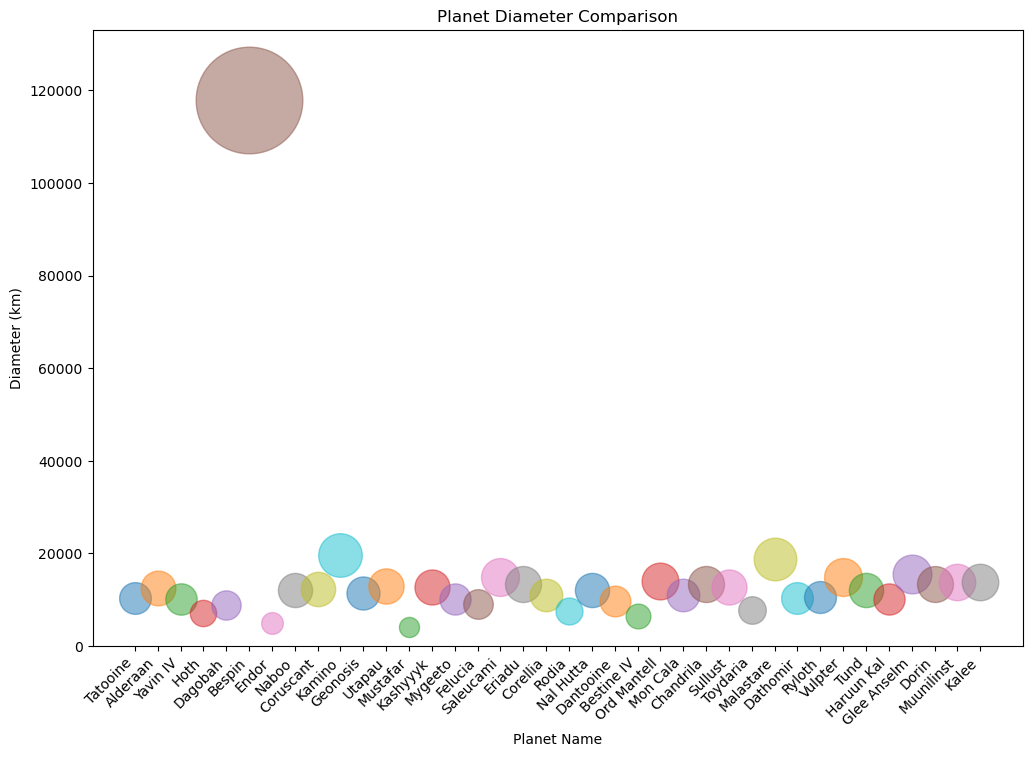

In [86]:
# Set up the plot
plt.figure(figsize=(12, 8))

# Plot circles for each planet based on diameter 
for index, planet in planets_df.iterrows():
    plt.scatter(
        x=index,  
        y=planet['diameter'],  
        s=planet['diameter'] / 20,  # Adjust the scaling factor as needed
        alpha=0.5,
        label=planet['name']
    )

# Set axis labels and title
plt.title('Planet Diameter Comparison')
plt.xlabel('Planet Name')
plt.ylabel('Diameter (km)')

# Set x-axis ticks and labels
plt.xticks(range(len(planets_df)), planets_df['name'], rotation=45, ha='right')

# Set the y-axis limit dynamically
plt.ylim(0, planets_df['diameter'].max() + 15000)

# Show the plot
plt.show()

Basic Statistics for Diameter:
count        35.000000
mean      14731.057143
std       18263.785958
min        4200.000000
25%       10160.000000
50%       12150.000000
75%       13650.000000
max      118000.000000
Name: diameter, dtype: float64


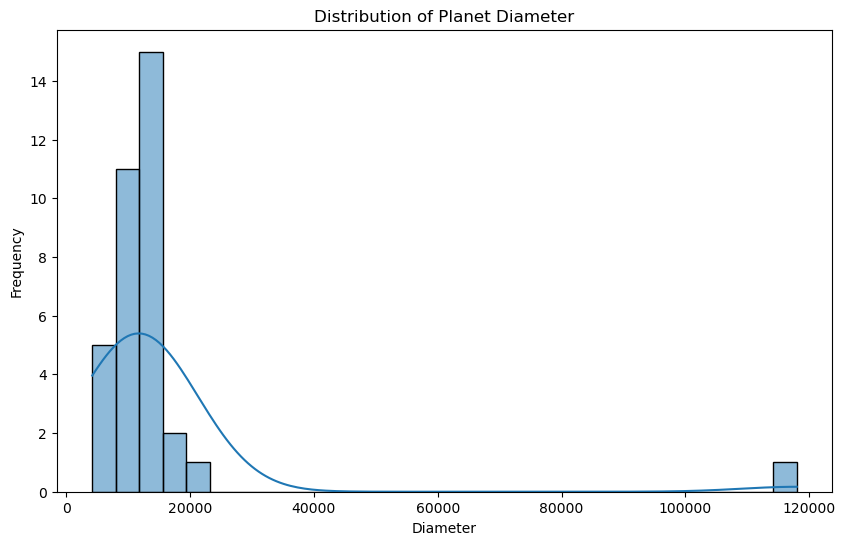

In [97]:
# Basic EDA for diameter
print("Basic Statistics for Diameter:")
print(planets_df['diameter'].describe())

# Visualize the distribution of diameter
plt.figure(figsize=(10, 6))
sns.histplot(planets_df['diameter'].dropna(), bins=30, kde=True)
plt.title('Distribution of Planet Diameter')
plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.show()

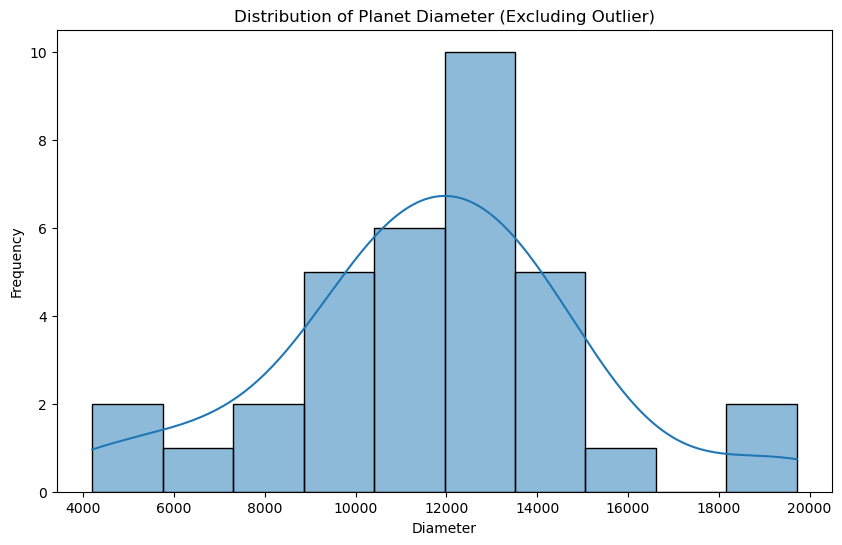

In [101]:
threshold = 40000
filtered_diameter = planets_df['diameter'].loc[planets_df['diameter'] < threshold]

# Visualize the distribution without the outlier
plt.figure(figsize=(10, 6))
sns.histplot(filtered_diameter.dropna(), bins=10, kde=True)
plt.title('Distribution of Planet Diameter (Excluding Outlier)')
plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.show()


In [92]:
# Remove all planets with a diameter of '0' or 'unknown'
planets_df = planets_df[(planets_df['population'] != 0)]
planets_df = planets_df[planets_df['population'] != 'unknown']

In [93]:
# Convert population to numeric
planets_df['population'] = pd.to_numeric(planets_df['population'])

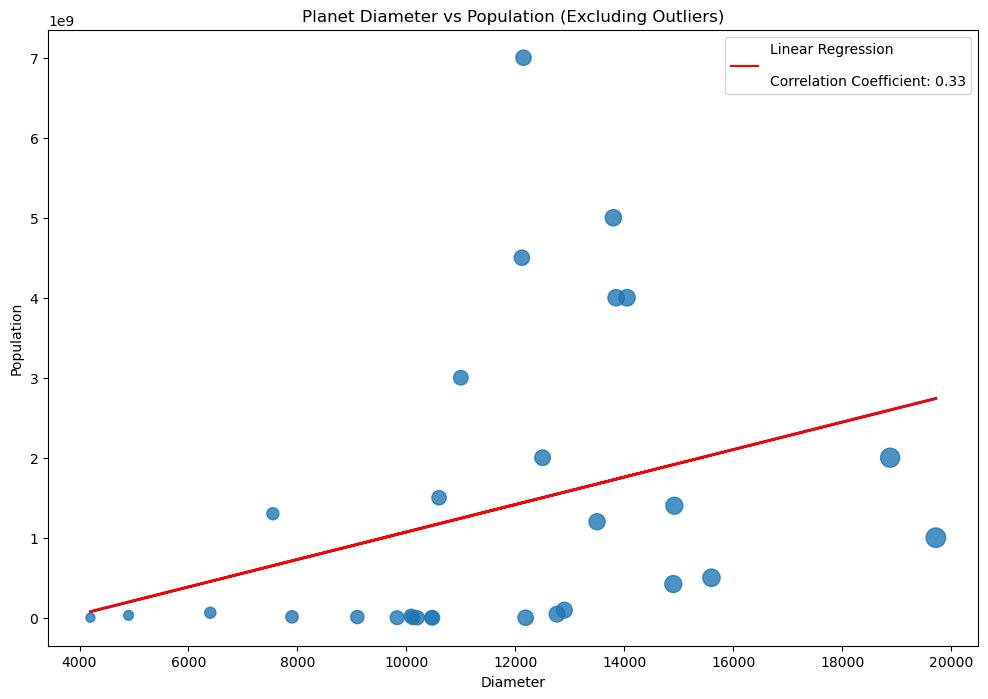

In [95]:
# Remove outliers (arbitrarily chosen threshold values)
diameter_threshold = 20000
population_threshold = 10000000000
filtered_planets_df = planets_df[(planets_df['diameter'] < diameter_threshold) & (planets_df['population'] < population_threshold)]

# Fit a linear regression line
linear_fit = np.polyfit(filtered_planets_df['diameter'], filtered_planets_df['population'], 1)
linear_line = np.polyval(linear_fit, filtered_planets_df['diameter'])

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a scatter plot with a regression line and label
sns.regplot(x='diameter', y='population', data=filtered_planets_df, scatter_kws={'s': filtered_planets_df['diameter'] / 100}, ci=None)

# Set axis labels and title
plt.title('Planet Diameter vs Population (Excluding Outliers)')
plt.xlabel('Diameter')
plt.ylabel('Population')

# Calculate the correlation coefficient
correlation_coef = filtered_planets_df['diameter'].corr(filtered_planets_df['population'])

plt.plot(filtered_planets_df['diameter'], linear_line, color='red', label=f'Linear Regression\n\nCorrelation Coefficient: {correlation_coef:.2f}')


# Add legend
plt.legend()


# Show the plot
plt.show()

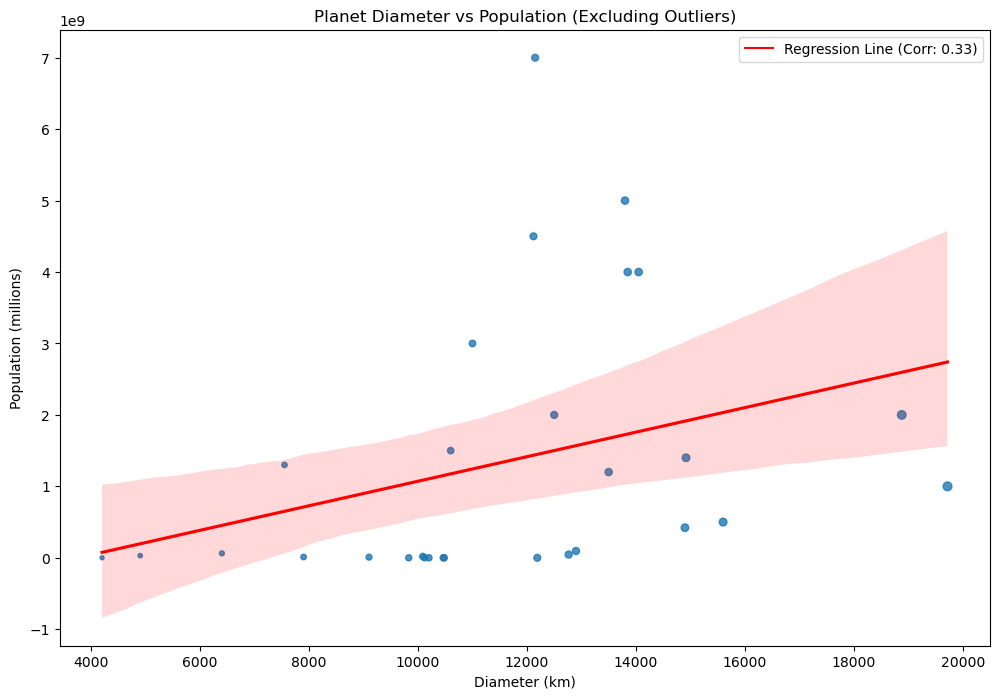

In [103]:
# Remove outliers (arbitrarily chosen threshold values)
diameter_threshold = 20000
population_threshold = 10000000000
filtered_planets_df = planets_df[(planets_df['diameter'] < diameter_threshold) & (planets_df['population'] < population_threshold)]

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a scatter plot with a red regression line, 95% confidence interval, and label
sns.regplot(x='diameter', y='population', data=filtered_planets_df, scatter_kws={'s': filtered_planets_df['diameter'] / 500}, line_kws={'color': 'red'})

# Add a separate line without markers for the legend
plt.plot([], [], color='red', label=f'Regression Line (Corr: {filtered_planets_df["diameter"].corr(filtered_planets_df["population"]):.2f})')

# Set axis labels and title
plt.title('Planet Diameter vs Population (Excluding Outliers)')
plt.xlabel('Diameter (km)')
plt.ylabel('Population (millions)')

# Add legend
plt.legend()

# Show the plot
plt.show()

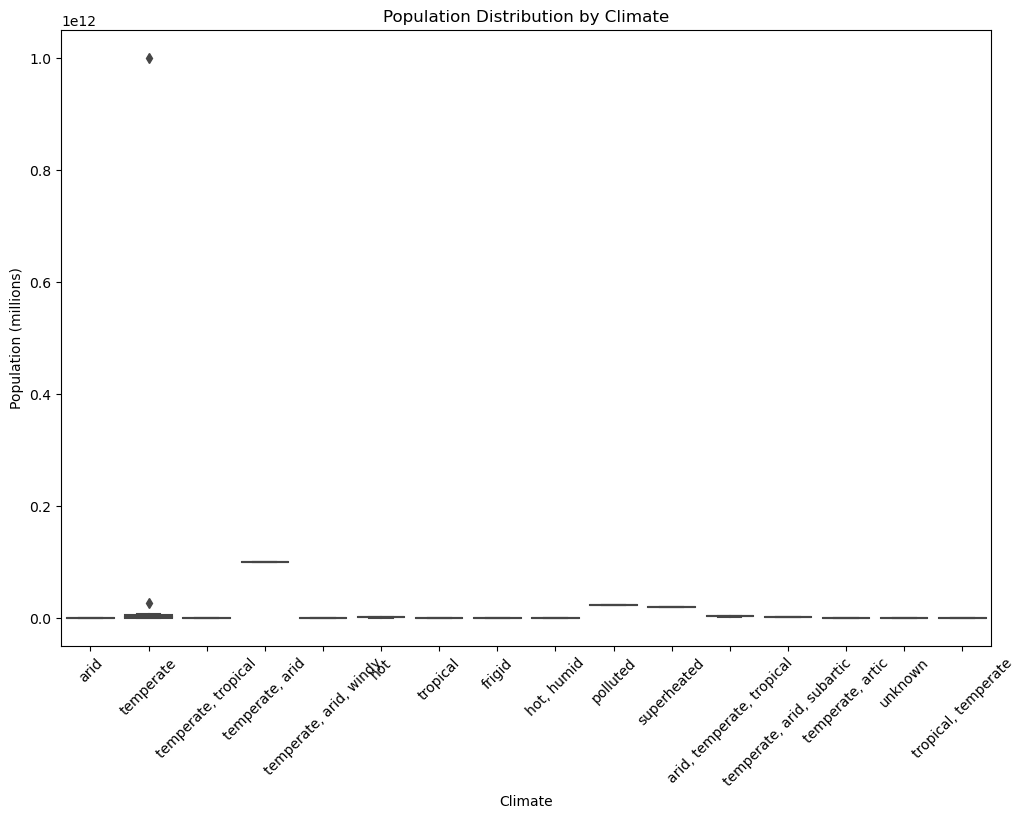

In [106]:
# Set up the plot
plt.figure(figsize=(12, 8))

# Create a box plot
sns.boxplot(x='climate', y='population', data=planets_df)

# Set axis labels and title
plt.title('Population Distribution by Climate')
plt.xlabel('Climate')
plt.ylabel('Population (millions)')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [24]:
planets_df

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown
5,Bespin,12,5110,118000,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,6000000
6,Endor,18,402,4900,temperate,0.85 standard,"forests, mountains, lakes",8,30000000
7,Naboo,26,312,12120,temperate,1 standard,"grassy hills, swamps, forests, mountains",12,4500000000
8,Coruscant,24,368,12240,temperate,1 standard,"cityscape, mountains",unknown,1000000000000
9,Kamino,27,463,19720,temperate,1 standard,ocean,100,1000000000
